In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import csv,os,re
import sklearn
import numpy as np

In [4]:
df = pd.read_csv(r'lyrics_extended.csv')

In [5]:

df['artist'].value_counts() #Every artist has a minimum of 10 songs. A total of 4942 artists


dolly-parton             741
elton-john               659
chris-brown              616
barbra-streisand         592
eddy-arnold              591
bee-gees                 588
bob-dylan                584
eminem                   572
ella-fitzgerald          571
american-idol            565
dean-martin              558
david-bowie              543
b-b-king                 541
elvis-costello           517
bruce-springsteen        509
beach-boys               469
bill-anderson            465
eric-clapton             444
chumbawamba              416
frank-sinatra            411
britney-spears           404
chicago                  400
frank-zappa              398
diana-ross               397
beatles                  395
50-cent                  394
celine-dion              386
emmylou-harris           383
chamillionaire           380
bon-jovi                 379
                        ... 
elliot-matsu              10
clara-lofaro              10
bluemchen                 10
clit-45       

In [6]:
df.head()

,song,artist,genre,lyrics,Unique_Word_Count,Type-Token Ratio,Sentiment Polarity,Word Density
0,ego-remix,beyonce-knowles,Pop,"Oh baby, how you doing?. You know I'm gonna cu...",159,0.367206,0.148268,9.640000
1,then-tell-me,beyonce-knowles,Pop,"playin' everything so easy,. it's like you see...",141,0.546512,0.115729,5.849057
2,honesty,beyonce-knowles,Pop,If you search. For tenderness. It isn't hard t...,119,0.700000,0.004720,4.072727
3,you-are-my-rock,beyonce-knowles,Pop,"Oh oh oh I, oh oh oh I. [Verse 1:]. If I wrote...",153,0.293103,0.407280,6.988506
4,black-culture,beyonce-knowles,Pop,"Party the people, the people the party it's po...",61,0.195513,-0.170833,10.424242


In [7]:
#Iteration 1: Taking the polarity,word density and type-token ratio to construct the clusters using k-means algorithm

from sklearn.cluster import KMeans
data = df.as_matrix(columns = df.columns[5:]) #Take the last three columns (all contin. numeric values) for building clusters
kmeans = KMeans(n_clusters=20, random_state=0).fit(data)

C:\Users\Mudit\Anaconda3\envs\tensorflow_gpuenv\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


In [8]:
kmeans.__dict__ #The inertia_ attribute gives a measure of how 'well-fitting' the clusters are

{'n_clusters': 20,
 'init': 'k-means++',
 'max_iter': 300,
 'tol': 0.0001,
 'precompute_distances': 'auto',
 'n_init': 10,
 'verbose': 0,
 'random_state': 0,
 'copy_x': True,
 'n_jobs': None,
 'algorithm': 'auto',
 'cluster_centers_': array([[5.52447268e-01, 8.56205591e-02, 5.66496577e+00],
        [5.80602535e-01, 3.41874189e-02, 1.28797241e+02],
        [4.99694480e-01, 5.92570849e-02, 2.87097561e+02],
        [5.12968928e-01, 8.38890156e-02, 8.94436836e+00],
        [5.67216789e-01, 7.08985731e-02, 5.15297901e+01],
        [4.61042685e-01, 8.66166964e-02, 2.37702128e+02],
        [5.07190451e-01, 4.32180708e-02, 1.96441176e+02],
        [4.62788302e-01, 7.49477293e-02, 4.63333333e+02],
        [5.39529241e-01, 1.05224868e-01, 1.31840719e+01],
        [6.04200650e-01, 2.92826828e-02, 9.85359291e+01],
        [5.28405638e-01, 9.28444491e-02, 6.70447938e+00],
        [5.76589447e-01, 2.60645159e-02, 1.62739362e+02],
        [5.84069060e-01, 6.81808297e-02, 2.18102134e+01],
        [6.1

In [9]:
#kmeans.labels_.shape The labels_ attribute tells us which cluster each data point falls into
kmeans.labels_

array([ 3,  0, 14, ...,  3, 17, 10])

In [10]:
#kmeans.cluster_centers_
data

array([[ 3.67205543e-01,  1.48268398e-01,  9.64000000e+00],
       [ 5.46511628e-01,  1.15728716e-01,  5.84905660e+00],
       [ 7.00000000e-01,  4.72027972e-03,  4.07272727e+00],
       ...,
       [ 5.22448980e-01, -1.23737374e-02,  8.39393939e+00],
       [ 5.84795322e-01,  3.58823529e-01,  7.29629630e+00],
       [ 4.06060606e-01,  2.66243386e-01,  6.87500000e+00]])

In [16]:
#Judge the optimal number of clusters to use for the k-means algorithm by the elbow method
#Determine which value of number of clusters minimises the cost function

def get_optimal_k(a,b): #Determine cost function(i.e. inertia_ value) for clusters ranging from 2 to 10
    inertia_values = []
    for x in range(a,b+1):
        kmeans = KMeans(n_clusters=x, random_state=0).fit(data) #Train model with specified number of clusters
        inertia_values.append((x,kmeans.inertia_))
    return inertia_values
        
        

In [50]:
cluster_wss = [] #To collect values for different number of clusters

In [33]:
inertia_values = get_optimal_k(2,20)

In [35]:

vals = sorted(inertia_values,key = lambda x: x[1]) #We can see that the inertia_ attribute values are constantly decreasing.

In [51]:
cluster_wss.extend(vals)
cluster_wss

[(20, 128939.22280179372),
 (19, 138560.09675727657),
 (18, 152461.66433840644),
 (17, 167489.26883002938),
 (16, 189411.65031604908),
 (15, 211272.85382526423),
 (14, 237427.7160558258),
 (13, 268807.13609644014),
 (12, 323907.7410623393),
 (11, 381932.54171513574),
 (10, 450597.1663957206),
 (9, 532281.1232177878),
 (8, 658697.6613983992),
 (7, 806777.858589231),
 (6, 1059542.2455119295),
 (5, 1490687.539602427),
 (4, 1994116.9681079555),
 (3, 2731534.312477865),
 (2, 4615719.627191159)]

In [52]:
#Plot a line graph to see variation
cluster_wss = [(x,y/x) for (x,y) in cluster_wss]
num_of_clusters = [x for (x,y) in cluster_wss]
average_wss =[y for (x,y) in cluster_wss]


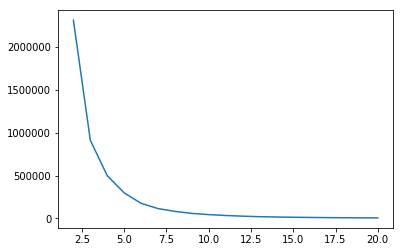

In [54]:
plt.plot(num_of_clusters,average_wss)
#By the elbow point method of validation of clusters, 6 appears to be the ideal number of clusters to use. 

In [57]:
sorted(cluster_wss,key = lambda x:x[1])

[(20, 6446.961140089686),
 (19, 7292.636671435609),
 (18, 8470.092463244802),
 (17, 9852.309931178199),
 (16, 11838.228144753068),
 (15, 14084.856921684282),
 (14, 16959.122575416128),
 (13, 20677.472007418473),
 (12, 26992.31175519494),
 (11, 34721.14015592143),
 (10, 45059.71663957206),
 (9, 59142.34702419865),
 (8, 82337.2076747999),
 (7, 115253.97979846157),
 (6, 176590.37425198825),
 (5, 298137.5079204854),
 (4, 498529.2420269889),
 (3, 910511.4374926216),
 (2, 2307859.8135955795)]

In [58]:
inertia_values = get_optimal_k(21,30)

In [61]:
cluster_wss2 = sorted(inertia_values,key = lambda x: x[1])

In [95]:
cluster_wss2 = [(x,y/x) for (x,y) in cluster_wss2]
num_of_clusters2 = [x for (x,y) in cluster_wss2]
average_wss2 =[y for (x,y) in cluster_wss2]


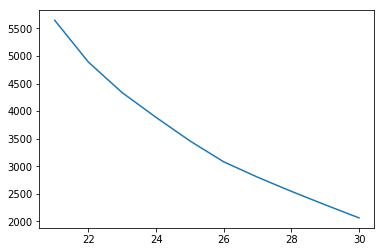

In [96]:
plt.plot(num_of_clusters2,average_wss2) #From this plot for number of clusters ranging from 20 to 30, we dont see any
#distinct 'elbow point' i.e. a point at which rate of change in average intra-cluster distance wrt cluster number is noticeably 
#different from the neighbouring points. Thus, 6 seems to be the correct choice. 

In [66]:
#Building our final K-Means clustering model for song level clustering, taking number of clusters to be 6:
kmeans_song_level_final = KMeans(n_clusters=6, random_state=0).fit(data)

In [68]:
song_cluster_label = kmeans_song_level_final.labels_

In [74]:
freq_count = np.bincount(song_cluster_label)

In [75]:
freq_count #Very unevenly distributed points among the clusters

array([143691,    329,     14,    134,    462,  74226], dtype=int64)

In [85]:
#Iteration 2: Taking only polarity and type-token ratio to build the clusters
data_2 = df.as_matrix(columns = df.columns[5:7]) #Take the last three columns (all contin. numeric values) for building clusters


C:\Users\Mudit\Anaconda3\envs\tensorflow_gpuenv\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [88]:
cluster_data_2 = []


In [89]:
inertia_values_2 = get_optimal_k(2,20)

In [92]:
cluster_wss_new = sorted(inertia_values_2,key = lambda x:x[1])

In [93]:
cluster_wss_new = [(x,y/x) for (x,y) in cluster_wss_new]
num_of_clusters_new = [x for (x,y) in cluster_wss_new]
average_wss_new =[y for (x,y) in cluster_wss_new]


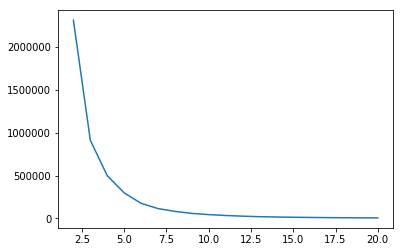

In [94]:
plt.plot(num_of_clusters_new,average_wss_new)

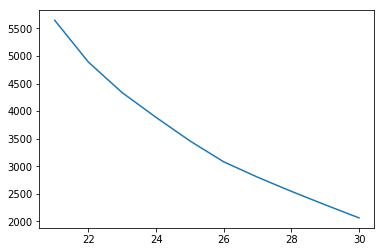

In [97]:
plt.plot(num_of_clusters,average_wss)

In [99]:
cluster_wss

[(20, 6446.961140089686),
 (19, 7292.636671435609),
 (18, 8470.092463244802),
 (17, 9852.309931178199),
 (16, 11838.228144753068),
 (15, 14084.856921684282),
 (14, 16959.122575416128),
 (13, 20677.472007418473),
 (12, 26992.31175519494),
 (11, 34721.14015592143),
 (10, 45059.71663957206),
 (9, 59142.34702419865),
 (8, 82337.2076747999),
 (7, 115253.97979846157),
 (6, 176590.37425198825),
 (5, 298137.5079204854),
 (4, 498529.2420269889),
 (3, 910511.4374926216),
 (2, 2307859.8135955795)]